In [ ]:

## to do: 
# smiles and FF matching --> topologie für die atom types
# lammps building template


In [53]:
import pandas as pd
import moleculegraph
from typing import Dict, List
from MDSetup.forcefield.molecule import moleculegraph_syntax, get_mollist_from_smiles, clean_mollist, get_mol_from_bond_list, adjust_bond_list_indexes

In [12]:
smiles = "CCCC" 

atom_names, atoms_xyz, bond_list = get_mollist_from_smiles(smiles)

# if len(atom_names) > forcefieldtypes:
#     UA_filter = {"C", "H"}
# else:
#     UA_filter = {}

# cleaned_atomtypes, cleaned_coordinates, cleaned_bond_list = clean_mollist(
#     atom_names, atoms_xyz, bond_list, UA_filter
# )


ff_depth = 2

In [1]:
from rdkit import Chem

In [53]:
topologies = { "CH3": Chem.MolFromSmarts("[CH3][CH2]") }

In [76]:
from rdkit.Chem import AllChem
import numpy as np



In [79]:
an, at, ax, bl = get_forcefield_molecule_from_smiles( "CCCO", {"CH3_alk":'[CH3]', "CH2_alk":'[CH2]', "CH2_alc":'[CH2][O]', "OH_alc":'[O]', "cH_alc": '[H][O]', "cH_alk": '[H][C]'}, True, True)
an,at

Matched atom C n° 0 with force field key: CH3_alk
Matched atom C n° 1 with force field key: CH2_alk
Matched atom C n° 2 with force field key: CH2_alk
Matched atom O n° 3 with force field key: OH_alc
Matched atom H n° 4 with force field key: cH_alk
Matched atom H n° 5 with force field key: cH_alk
Matched atom H n° 6 with force field key: cH_alk
Matched atom H n° 7 with force field key: cH_alk
Matched atom H n° 8 with force field key: cH_alk
Matched atom H n° 9 with force field key: cH_alk
Matched atom H n° 10 with force field key: cH_alk
Matched atom H n° 11 with force field key: cH_alc


(array(['C', 'C', 'C', 'O', 'H'], dtype='<U1'),
 array(['CH3_alk', 'CH2_alk', 'CH2_alk', 'OH_alc', 'cH_alc'], dtype='<U7'))

In [48]:
def filter_bonds_by_elements(bond_list, atom_types, element):
    """Filter bonds where the bonded atoms include specific elements."""
    cleaned_bond_list = []
    cleaned_atomtypes = []

    for b0, b1 in bond_list:
        a0, a1 = atom_types[[b0, b1]]
        # If element in present in this bond, skip it.
        if element in {a0, a1}:
            continue
        cleaned_bond_list.append((b0, b1))
        cleaned_atomtypes.append((a0, a1))

    return np.array(cleaned_bond_list), np.array(cleaned_atomtypes)

In [62]:
cleaned_atomnames

array(['C', 'C', 'C', 'C', 'H'], dtype='<U1')

In [61]:
cleaned_atomtypes

array(['CH3_alk', 'CH2_alk', 'CH2_alc', 'OH_alc', 'cH_alc'], dtype='<U8')

In [60]:
cleaned_coordinates

array([[-1.5026692 , -0.09275756, -0.04840631],
       [-0.08536994, -0.43846768, -0.41083757],
       [ 0.8514522 ,  0.55337043,  0.2545288 ],
       [ 2.15602614,  0.22371304, -0.08730026],
       [ 2.52658485, -0.51083336,  0.46929023]])

In [49]:
clean_mollist( at, ax, bl, "carbon_h" )

(array(['CH3_alk', 'CH2_alk', 'CH2_alc', 'OH_alc', 'carbon_h', 'carbon_h',
        'carbon_h', 'carbon_h', 'carbon_h', 'carbon_h', 'carbon_h',
        'cH_alc'], dtype='<U8'),
 array([[-1.5026692 , -0.09275756, -0.04840631],
        [-0.08536994, -0.43846768, -0.41083757],
        [ 0.8514522 ,  0.55337043,  0.2545288 ],
        [ 2.15602614,  0.22371304, -0.08730026],
        [-1.96115239, -0.91508264,  0.56751542],
        [-1.5456706 ,  0.80703921,  0.62039479],
        [-2.10818136,  0.05676837, -0.96275909],
        [ 0.19008575, -1.46708978, -0.14260452],
        [ 0.04311132, -0.33533771, -1.51139709],
        [ 0.76372241,  0.53807322,  1.34940015],
        [ 0.67206081,  1.58060449, -0.09782454],
        [ 2.52658485, -0.51083336,  0.46929023]]),
 array([[ 0,  1],
        [ 1,  2],
        [ 2,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 1,  7],
        [ 1,  8],
        [ 2,  9],
        [ 2, 10],
        [ 3, 11]]))

In [ ]:
from rdkit import Chem

# Define your molecule
mol = Chem.MolFromSmiles('CCCO')

mol_with_hydrogens = Chem.AddHs(mol)

# Define a list of substructures
substructures = ['[CH2][O]', '[CH3]', '[O]']
substructures_mols = [ Chem.MolFromSmarts(substructure_smarts) for substructure_smarts in substructures]

substructure_matches = { substructure: mol_with_hydrogens.GetSubstructMatches(substructure_mol) for substructure,substructure_mol in zip(substructures,substructures_mols) }

for atom in mol.GetAtoms():
    atom_index = atom.GetIdx()

    for substructure, matches in substructure_matches.items():
        if any( atom_index == match[0] for match in matches ):
            print(f"matched atom {atom.GetSymbol()} n° {atom_index} with substructure: {substructure}") 

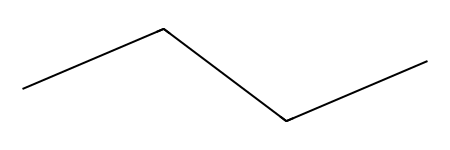

In [2]:
butane = Chem.MolFromSmiles("CCCC")
butane

In [3]:
butane.GetConformer()

ValueError: Bad Conformer Id

In [91]:
from rdkit import Chem

# Define your molecule
mol = Chem.MolFromSmiles('CCCO')

mol_with_hydrogens = Chem.AddHs(mol)

# Define a list of substructures
substructures = ['[CH2][O]', '[CH3]', '[O]']
substructures_mols = [ Chem.MolFromSmarts(substructure_smarts) for substructure_smarts in substructures]

substructure_matches = { substructure: mol_with_hydrogens.GetSubstructMatches(substructure_mol) for substructure,substructure_mol in zip(substructures,substructures_mols) }

for atom in mol.GetAtoms():
    atom_index = atom.GetIdx()

    for substructure, matches in substructure_matches.items():
        if any( atom_index == match[0] for match in matches ):
            print(f"matched atom {atom.GetSymbol()} n° {atom_index} with substructure: {substructure}") 

matched atom C n° 0 with substructure: [CH3]
matched atom C n° 2 with substructure: [CH2][O]
matched atom O n° 3 with substructure: [O]


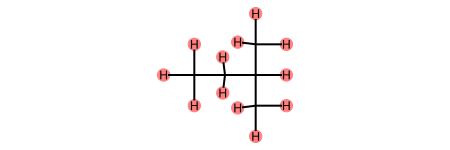

In [78]:
mol_with_hydrogens

In [74]:
mol = Chem.MolFromSmiles('CC(C)CC')
mol_with_hydrogens = Chem.AddHs(mol)

for atom in mol_with_hydrogens.GetAtoms():
    print(atom.GetSymbol())

C
C
C
C
C
H
H
H
H
H
H
H
H
H
H
H
H


In [71]:
atom.GetSymbol()

'C'

In [55]:
butane.GetSubstructMatches( topologies["CH3"] )

((0, 1), (3, 2))

In [ ]:
Chem.MolFromSmarts('[R2]')

In [32]:
atom_names

array(['C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       'H'], dtype='<U1')

In [28]:
from moleculegraph.molecule_utils import (
    graph_from_bonds,
    get_longest_path,
    bond_list_from_simple_path,
    get_diff_in_bond_lists,
    get_next_index,
    get_shortest_nontrivial_path,
)


In [29]:
graph = graph_from_bonds(bond_list)

main_path = get_longest_path(graph, source=0)

In [36]:
main_path

array([ 0,  1,  3, 11])

In [34]:
main_path_bond_list = bond_list_from_simple_path(main_path)
remaining_bonds = get_diff_in_bond_lists(bond_list, main_path_bond_list)

In [37]:
remaining_bonds

array([[ 0,  2],
       [ 0,  4],
       [ 0,  5],
       [ 1,  6],
       [ 1,  7],
       [ 2,  8],
       [ 2,  9],
       [ 2, 10],
       [ 3, 12],
       [ 3, 13]])

In [38]:
subgraph = graph_from_bonds(remaining_bonds)

In [39]:
subgraph

In [40]:
idx = get_next_index(main_path, remaining_bonds)

In [42]:
subpath = get_longest_path(subgraph, source=idx)
subpath_bond_list = bond_list_from_simple_path(subpath)
match = np.intersect1d(main_path, subpath)

In [43]:
subpath_bond_list

array([[0, 2],
       [2, 8]])

In [35]:
main_path_bond_list

array([[ 0,  1],
       [ 1,  3],
       [ 3, 11]])

In [25]:
mol_ser = match_molecule_to_force_field( atom_names, bond_list, ff_depth, {} )
mol_ser

array([['C', '0.0'],
       ['C', '1.0'],
       ['H', '1.0'],
       ['H', '1.0'],
       ['H', '1.0'],
       ['H', '2.0'],
       ['H', '2.0'],
       ['C', '2.0']], dtype='<U3')

In [12]:
for top in mol_ser:
    
    

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [27]:
top_ser = get_topology_series( "(C)(b1)(H)(b1)(H)(b1)(H)(*)(b1)(H)(b1)(H)(*)", 2 )
top_ser

array([['C', '0.0'],
       ['H', '1.0'],
       ['H', '1.0'],
       ['H', '1.0'],
       ['*', '1.0'],
       ['H', '2.0'],
       ['H', '2.0'],
       ['*', '2.0']], dtype='<U3')

In [60]:
for index,value in sorted_filtered_row.items():
    
    print(index,value)
    idx = ser.index[(ser.index == index) & (ser == value)].tolist()
    print(idx)
    if (index,value) in zip(ser.index,ser.values):
        print("there")
    break

C 0.0
['C']
there


In [16]:

# smiles = [ "CCCC", "CCCCCC" ]
# force_field_paths = [ "/Users/samir/Documents/Coding_libaries/pyLMP/force-fields/forcefield_UA_TAMie_alkanes.toml" ]

# ff = forcefield( smiles = smiles, force_field_paths = force_field_paths )

# residues = ["butane","hexane"]


# files_suffix = "mol"

# template = "/Users/samir/Documents/Coding_libaries/pyLMP/templates/lammps/template_lammps.mol"

# #ff.write_molecule_files( template, ".", residues, files_suffix, **kwargs )


Force field provided for software 'LAMMPS'
